<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/0918_gg_45_opencv_digit_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

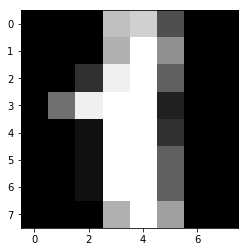

In [64]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [8]:
digits.data.shape

(1797, 64)

In [0]:
digits.data.shape

(1797, 64)

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
digits.images.shape

(1797, 8, 8)

In [49]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색
print(digits.images[5])

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


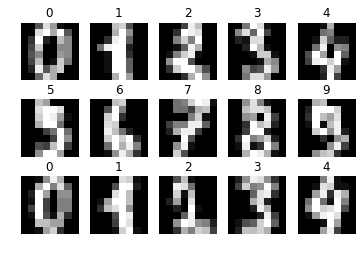

In [50]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [65]:
x = digits.images
x = x.reshape((-1, 64))

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
# y_pred = clf.predict(x_test)
# print(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9622222222222222

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)


0.9755555555555555

In [36]:
x_train.shape, y_train.shape

((1347, 64), (1347,))

In [33]:
x_test.shape

(450, 64)

In [66]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [0]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 
    # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [0]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
img = cv2.imread("digits.pkl")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit2.png")
print("digit2.png = " + str(n))
plt.show()

In [0]:
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9.png")
print("digit9.png = " + str(n))
plt.show()

In [0]:
img = cv2.imread("digit9-2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9-2.png")
print("digit9-2.png = " + str(n))
plt.show()